<CENTER>
    <img src="https://www.opportunitiesforafricans.com/wp-content/uploads/2016/11/ictp-696x222.png" alt="Satellite image of three hurricanes" width="40%">
</CENTER>

## Simple notebook to convert and analyse a picture using 2D histograms
**arturos@cern.ch**

##### Source of the data

###### Satellite pictures used in the example
* https://www.ncdc.noaa.gov/gibbs/availability/2018-01-01

We will work with one IR satellite picture

In [1]:

TASImage image("Skullgirls.jpg");
UInt_t yPixels = image.GetHeight();
UInt_t xPixels = image.GetWidth();
UInt_t *argb   = image.GetArgbArray();

TH2D* h1 = new TH2D("h1","Satellite image of three hurricanes 1",xPixels,-1,1,yPixels,-1,1);

TH2D* h2 = new TH2D("h2","Satellite image of three hurricanes 2",xPixels,-1,1,yPixels,-1,1);

Let's extract the pixel information and save it in a 2D histogram.

In [2]:
float entriesInPixel= 4288000000;

for (int row=0; row<xPixels; ++row)
{
    for (int col=0; col<yPixels; ++col)
    {
        int index = col*xPixels+row;
        
        float indexvalue = float(argb[index]);
        float greyScale = float(argb[index]&0xff)/256;
        
        if(indexvalue > entriesInPixel)
        {
            h1->SetBinContent(row+1,yPixels-col,indexvalue);
        }
        h2->SetBinContent(row+1,yPixels-col,greyScale);
    }
}

Draw the 2D histogram

In [3]:
//gStyle->SetPalette(53);

h2->Divide(h1);

h2->Draw("colz");

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


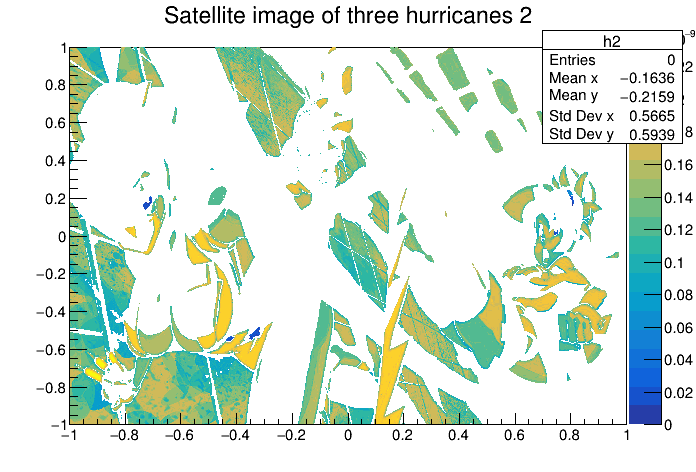

In [4]:
c1->Draw()

### the original image is
<img src="8885308-3x2-940x627.jpg" alt="Satellite image of three hurricanes" width="70%"> 

done